In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats


## 抽样误差
由于抽样引起的样本的统计量与总体参数间的差异

个体差异与抽样。

### 标准误 SE
对于抽样前而言，样本均数取值是随机的，样本均数总是在总体均数附近随机波动，波动幅度随着样本量的增大而减小，样本均数的标准差与样本量大小有关，也与抽样总体的标准差有关。为减少抽样误差，应尽可能保证足够大的样本含量。

if $x \sim \mathcal{N}(\mu, \sigma^2)$, then $\bar{X} \sim \mathcal{N}(\mu, \sigma_{\bar{X}}^2)$.

$$\sigma_{\bar{X}}^2 = \frac{\sigma^2}{n}, \quad S_{\bar{x}}^2 = \frac{S^2}{n}$$

further: $\sigma_{\bar{X}}^2 = \frac{\sigma^2}{n}$ is general, independent with types of distributions

反应样本均数的离散程度，也反应了抽样误差的大小。

其中$\sigma_{\bar{x}}$称为样本均数的理论标准误。而$S_{\bar{x}}$称为样本均数的估计标准误。

#### 与标准差的区别
- 样本标准差是反映样本中各观测值变异程度大小的一个指标，它的大小说明了对该样本代表性的强弱。
- 样本标准误是样本平均数的标准差，它是抽样误差的估计值，其大小说明了样本间变异程度的大小及精确性的高低。

### 中心极限定理 CLT

个体资料X服从偏态的分布，当样本量n较大时，样本均数$\bar{x}$近似服从正态分布。
可以来求样本均数的变异情况。即使对总体的精确分布不清楚，也可以利用对分布参数以及相应的抽样分布规律进行研究。

- 从均数为$\mu$，标准差为$\sigma$的正态分布总体中进行随机抽样，样本均数将服从均数为$\mu$，标准差为$\sigma_{\bar{x}}$的正态分布$\mathcal{N}(\mu, \frac{\sigma^2}{n})$，或表示为$\mathcal{N}(\mu, \sigma_{\bar{X}}^2)$
- 从均数为$\mu$，标准差为$\sigma$的任意非正态总体中进行随机抽样，随着样本量的增加，样本均数的分布将越来越接近$\mathcal{N}(\mu, \sigma_{\bar{X}}^2)$

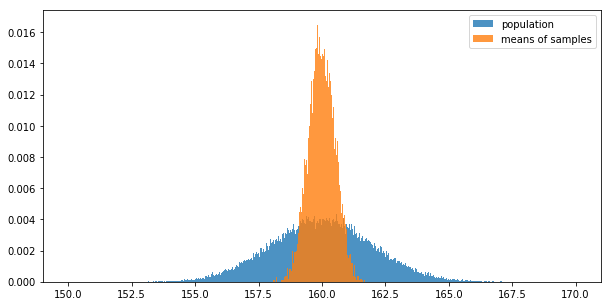

In [76]:
N = scipy.stats.norm(loc=160, scale=2)
population = N.rvs(size=100000)
sample_mean = [np.mean(np.random.choice(population,15)) for _ in range(10000)]

count, pos = np.histogram(population,bins=1000,range=(150,170))
count_s, pos_s = np.histogram(sample_mean,bins=1000,range=(150,170))

plt.figure(figsize=(10,5))
plt.bar(pos[0:-1], count/100000, width=0.02, alpha=0.8, label="population")
plt.bar(pos_s[0:-1], count_s/10000, width=0.02, alpha=0.8, label="means of samples")
plt.legend()
plt.show()

## 样本率的分布
总体率由样本率来估计。

样本率本身就是一个均数的概念。

e.g. 对于Binomial分布，$Var(p) = \frac{Var(x)}{n^2} $

$$\mu_P = \pi$$

$$\sigma_P = \sqrt{\frac{\pi (1-\pi)}{n}} $$

# t分布
实际研究中，$\sigma$未知，用样本的标准差来替代。

$$ t = \frac{\bar{X} - \mu}{S / \sqrt{n}} \sim t(\nu)$$

自由度 $\nu$

## 特征
1. t分布的曲线形态仅受自由度的影响。
2. 当自由度无穷大时，t分布变为了标准正态分布。

## 与标准正态分布u分布的区别
均以0为中心左右两侧完全对称的分布，只是t分布曲线顶端较u分布低，两端翘。（v逐渐增大，t分布逐渐逼近u分布）。

正态分布的特点：
1. 以均数为中心左右两侧完全对称分布；
2. 两个参数，均数u（位置参数）和s（变异参数）；
3. 对称均数的两侧面积相等。

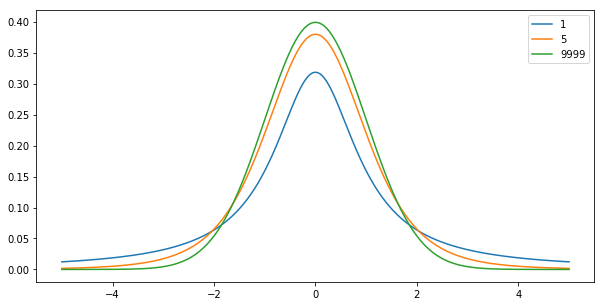

In [86]:
X = np.linspace(-5,5,1000)
plt.figure(figsize=(10,5))
[plt.plot(X, scipy.stats.t(i).pdf(X), label=str(i)) for i in [1,5,9999]]
plt.legend()
plt.show()

# $\chi^2$分布

若随机变量Z服从标准正态分布，则其平方将服从自由度为1的$\chi^2$分布。若随机变量X服从正态分布$\mathcal{N}(\mu, \sigma^2)$且相互独立，则
$$ \frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \mu)^2 \sim \chi^2(n) $$

$$ \frac{(n-1)}{\sigma^2} S^2 = \sum_{i=1}^n \frac{(X_i - \bar{X})^2}{\sigma^2} \sim \chi^2(n-1) $$

## 特征
1. 为一簇单峰正偏态分布曲线，且随自由度的增加，正偏(右偏)的程度越来越小。

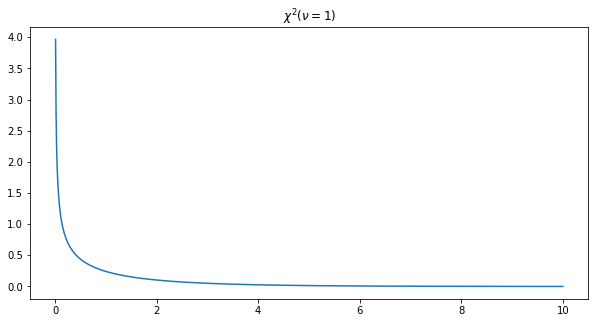

In [97]:
X = np.linspace(0,10,1000)
plt.figure(figsize=(10,5))
plt.plot(X, scipy.stats.chi2(1).pdf(X))
plt.title("$\chi^2(\\nu=1)$")
plt.show()

# F分布

$$ F = \frac{S_1^2}{S_2^2} $$

$$ \nu = (n_1 - 1, n_2 - 1) $$

检验方差齐性。